In [26]:
import pandas as pd
pd.set_option('display.max_columns', 40)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [7]:
highlight_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/utils/data/nfl_ngs_highlights_index.tsv'
highlight_df = pd.read_csv(highlight_url, sep ='\t')

In [8]:
play_url = 'https://raw.githubusercontent.com/asonty/ngs_highlights/master/play_data/2019_WAS_2019121508_700.tsv'
play_df = pd.read_csv(play_url, sep= '\t')

In [51]:
single_frame = play_df.loc[play_df.frame == 100]

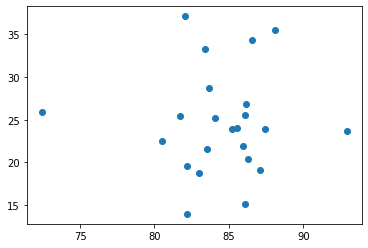

In [19]:
plt.scatter(single_frame.x, single_frame.y)



In [18]:
single_frame.head()

,gameId,playId,playType,season,seasonType,week,preSnapHomeScore,preSnapVisitorScore,playDirection,quarter,gameClock,down,yardsToGo,yardline,yardlineSide,yardlineNumber,absoluteYardlineNumber,possessionFlag,homeTeamFlag,teamAbbr,frame,displayName,esbId,gsisId,jerseyNumber,nflId,position,positionGroup,time,x,y,s,o,dir,event,playDescription
0,2019121508,700,play_type_pass,2019,REG,15,0,3,left,1,01:23,1,10,WAS 25,WAS,25,85,1.0,1.0,WAS,0,Donald Penn,PEN244635,00-0023894,72.0,2506706.0,T,OL,2019-12-15 18:25:56.400,86.29,20.44,0.33,275.59,357.89,line_set,(1:23) D.Haskins pass short middle to T.McLaur...
353,2019121508,700,play_type_pass,2019,REG,15,0,3,left,1,01:23,1,10,WAS 25,WAS,25,85,1.0,1.0,WAS,0,Adrian Peterson,PET260705,00-0025394,26.0,2507164.0,RB,RB,2019-12-15 18:25:56.400,92.91,23.69,0.50,268.29,263.10,line_set,(1:23) D.Haskins pass short middle to T.McLaur...
706,2019121508,700,play_type_pass,2019,REG,15,0,3,left,1,01:23,1,10,WAS 25,WAS,25,85,1.0,1.0,WAS,0,Morgan Moses,MOS280929,00-0031330,76.0,2543489.0,T,OL,2019-12-15 18:25:56.400,86.18,26.84,0.51,264.28,58.69,line_set,(1:23) D.Haskins pass short middle to T.McLaur...
1059,2019121508,700,play_type_pass,2019,REG,15,0,3,left,1,01:23,1,10,WAS 25,WAS,25,85,1.0,1.0,WAS,0,Ereck Flowers,FLO325059,00-0032259,77.0,2552452.0,T,OL,2019-12-15 18:25:56.400,85.94,21.94,0.12,273.34,160.97,line_set,(1:23) D.Haskins pass short middle to T.McLaur...
1412,2019121508,700,play_type_pass,2019,REG,15,0,3,left,1,01:23,1,10,WAS 25,WAS,25,85,1.0,1.0,WAS,0,Jeremy Sprinkle,SPR573222,00-0033528,87.0,2557886.0,TE,TE,2019-12-15 18:25:56.400,87.10,19.13,0.71,281.51,247.17,line_set,(1:23) D.Haskins pass short middle to T.McLaur...


In [22]:
player_play_df = play_df.loc[play_df.nflId ==  2506706.0]

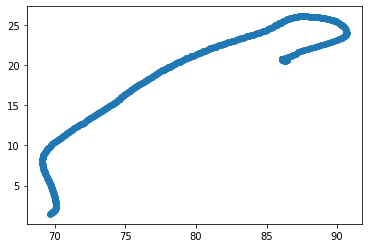

In [24]:
plt.scatter(player_play_df.x, player_play_df.y)

In [42]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax

No handles with labels found to put in legend.


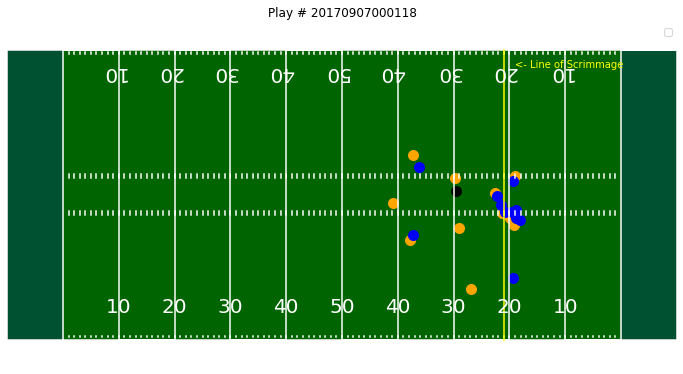

In [60]:
yl = single_frame.yardlineNumber.reset_index(drop=True)[0]
fig, ax = create_football_field(highlight_line=True,
                                highlight_line_number=yl+54)


single_frame.query('homeTeamFlag == 0') \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='orange', s=100, legend='Away')

single_frame.query('homeTeamFlag == 1') \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=100, legend='Home')

single_frame.query("displayName == 'ball'") \
    .plot(x='x', y='y', kind='scatter', ax=ax, color='black', s = 100, legend='Ball')


plt.title('Play # 20170907000118')
plt.legend()
plt.show()